#  Dataset description
   
   Bank client data:
   
   1 - age (numeric) 
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-  employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric)
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
    related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
    other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [116]:
data = pd.read_csv('bank-full.csv', delimiter=';')
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [117]:
scoring = 'accuracy'
data['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [118]:
poutcomes = data[bank.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = data.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(bank))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(bank))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 45211
Success Rate (Current Campaign): 0.11698480458295547
Success Rate (Previous Campaign): 0.0334210700935613


# Data Preprocessing

In [119]:
dtypes = pd.DataFrame(data.dtypes.rename('type')).reset_index().astype('str')

In [120]:
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric,end='\n\n')
print('Categorical:\n', categorical)

Numeric:
 ['age' 'balance' 'day' 'campaign' 'pdays' 'previous']

Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome']


In [121]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [123]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [124]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### No null values

In [125]:
data.shape

(45211, 17)

In [126]:
# Calculate the count of 'unknown' and 'other' in the 'poutcome' column
unknown_count = (data['poutcome'] == 'unknown').sum()
other_count = (data['poutcome'] == 'other').sum()

# Calculate the total count of values in the 'poutcome' column
total_count = len(data)

# Calculate the percentage of 'unknown' and 'other'
percentage_unknown = (unknown_count / total_count) * 100
percentage_other = (other_count / total_count) * 100

print("Percentage of 'unknown' in poutcome:", percentage_unknown)
print("Percentage of 'other' in poutcome:", percentage_other)

Percentage of 'unknown' in poutcome: 81.74780473778506
Percentage of 'other' in poutcome: 4.06980602065869


In [127]:
# Drop the 'poutcome' column from the dataset
data = data.drop(columns=['poutcome'])

In [128]:

# Calculate the percentage of 'unknown' values in each column
unknown_percentages = (data == 'unknown').mean() * 100

# Calculate the percentage of 'unknown' values in each row
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")


Percentage of 'unknown' values in each column:
age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: contact, Percentage: 28.80%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 18.75%


In [129]:
#  So we will Drop the row with index 4
data = data.drop(4)

# Handling Outliers

<Axes: >

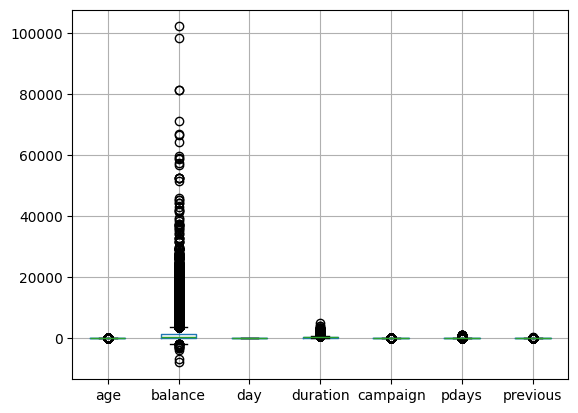

In [130]:
data.boxplot()

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

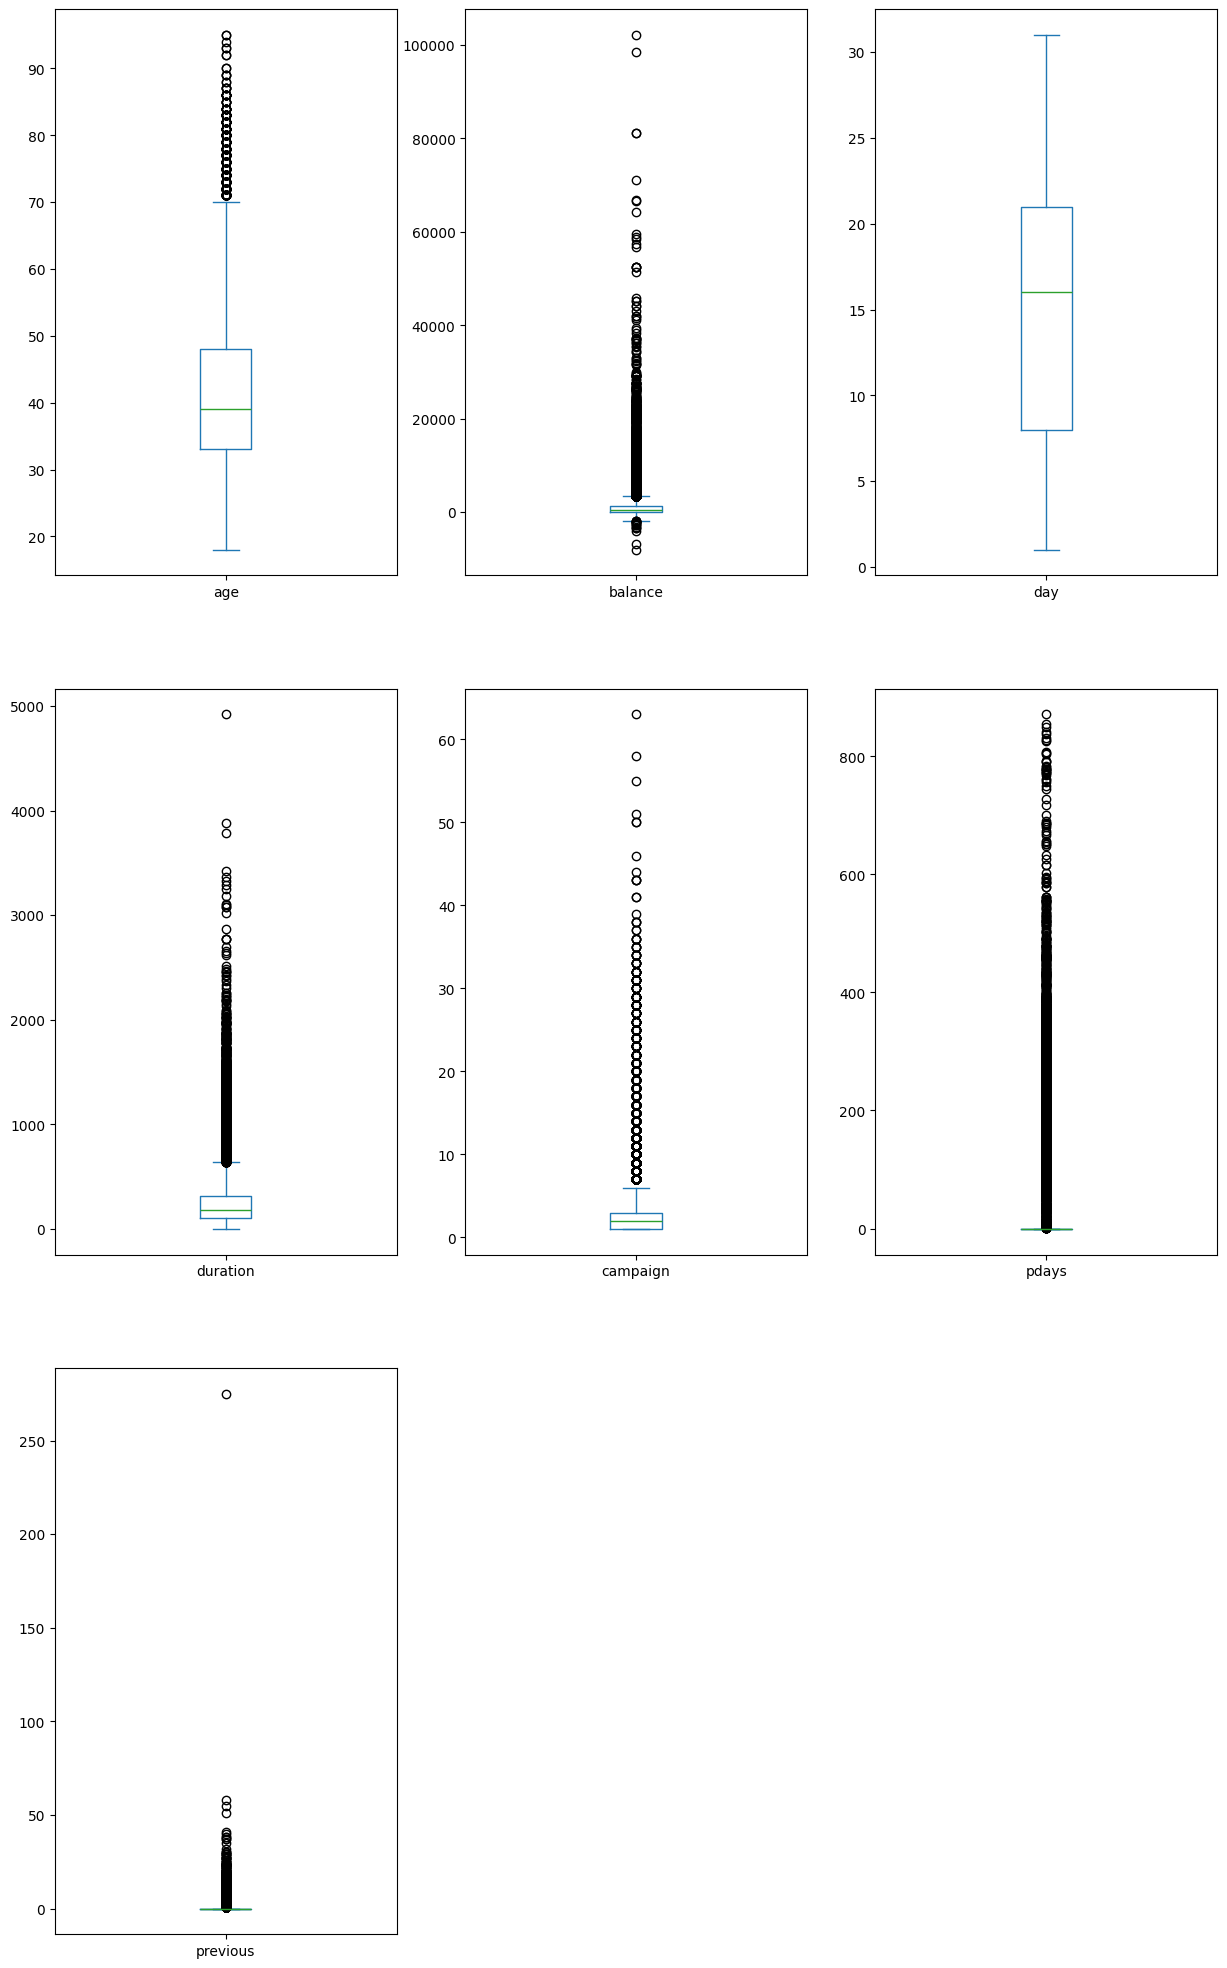

In [131]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))


In [132]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]

In [133]:
data = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

In [ ]:
Q1 = data['campaign'].quantile(0.10)
Q3 = data['campaign'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]

data = data[(data['campaign'] >= lower_bound) & (data['campaign'] <= upper_bound)]

In [32]:
Q1 = data['duration'].quantile(0.20)
Q3 = data['duration'].quantile(0.80)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]

data = data[(data['duration'] >= lower_bound) & (data['duration'] <= upper_bound)]

In [33]:
Q1 = data['previous'].quantile(0.05)
Q3 = data['previous'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]

data = data[(data['previous'] >= lower_bound) & (data['previous'] <= upper_bound)]

In [34]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

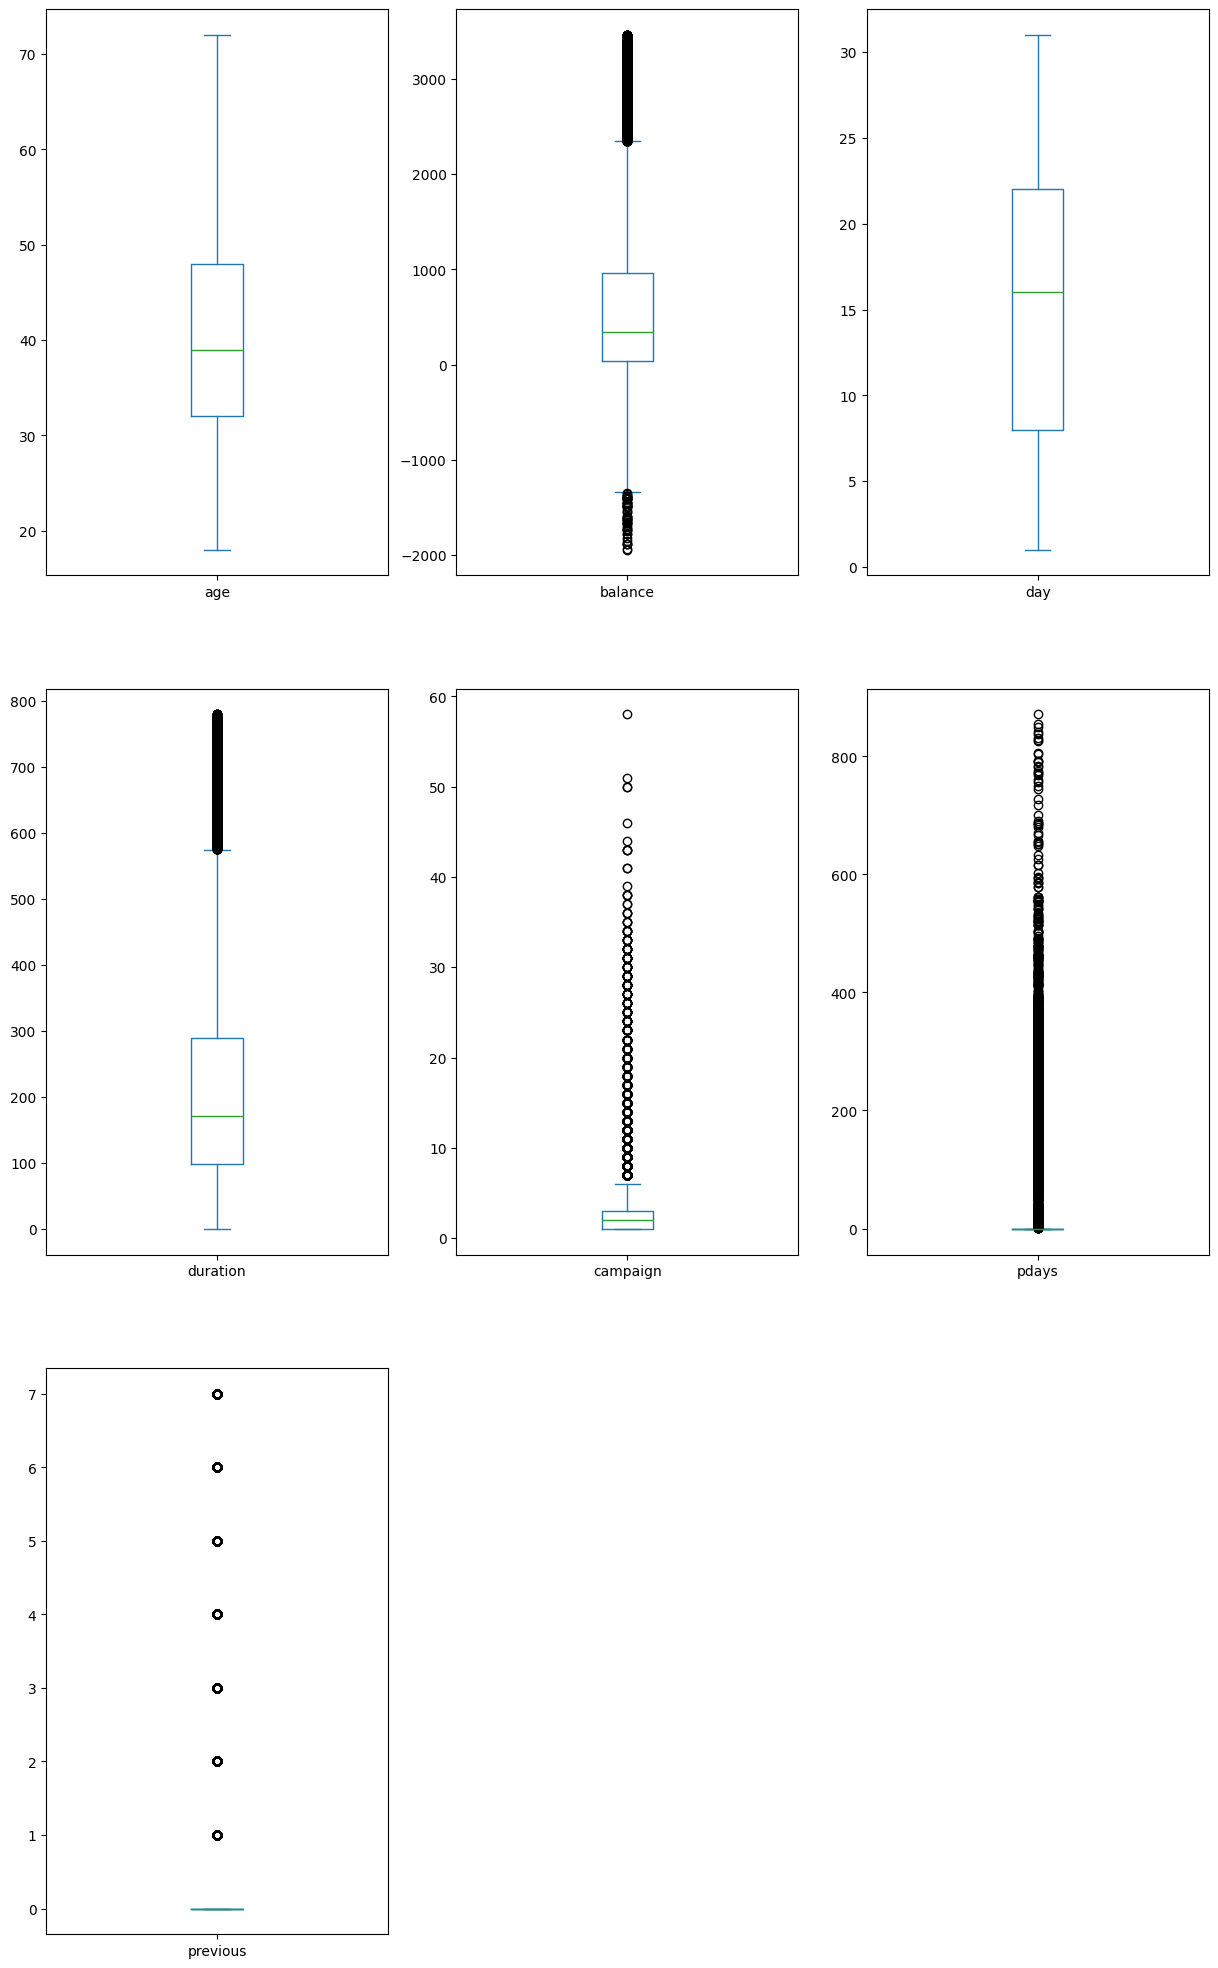

In [35]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

In [36]:
data.shape

(37928, 16)

<Axes: >

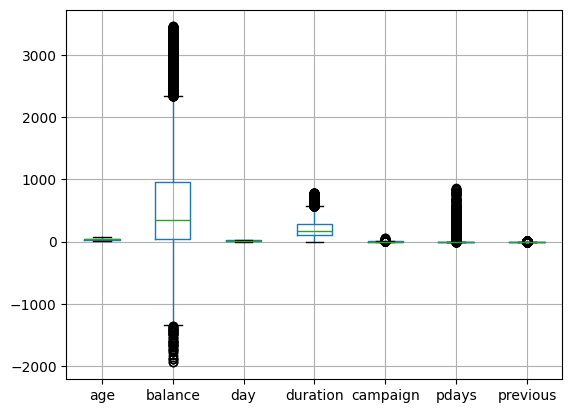

In [37]:
data.boxplot()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37928 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        37928 non-null  int64 
 1   job        37928 non-null  object
 2   marital    37928 non-null  object
 3   education  37928 non-null  object
 4   default    37928 non-null  object
 5   balance    37928 non-null  int64 
 6   housing    37928 non-null  object
 7   loan       37928 non-null  object
 8   contact    37928 non-null  object
 9   day        37928 non-null  int64 
 10  month      37928 non-null  object
 11  duration   37928 non-null  int64 
 12  campaign   37928 non-null  int64 
 13  pdays      37928 non-null  int64 
 14  previous   37928 non-null  int64 
 15  y          37928 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.9+ MB


# EDA

## Q1: How does job affect loan?

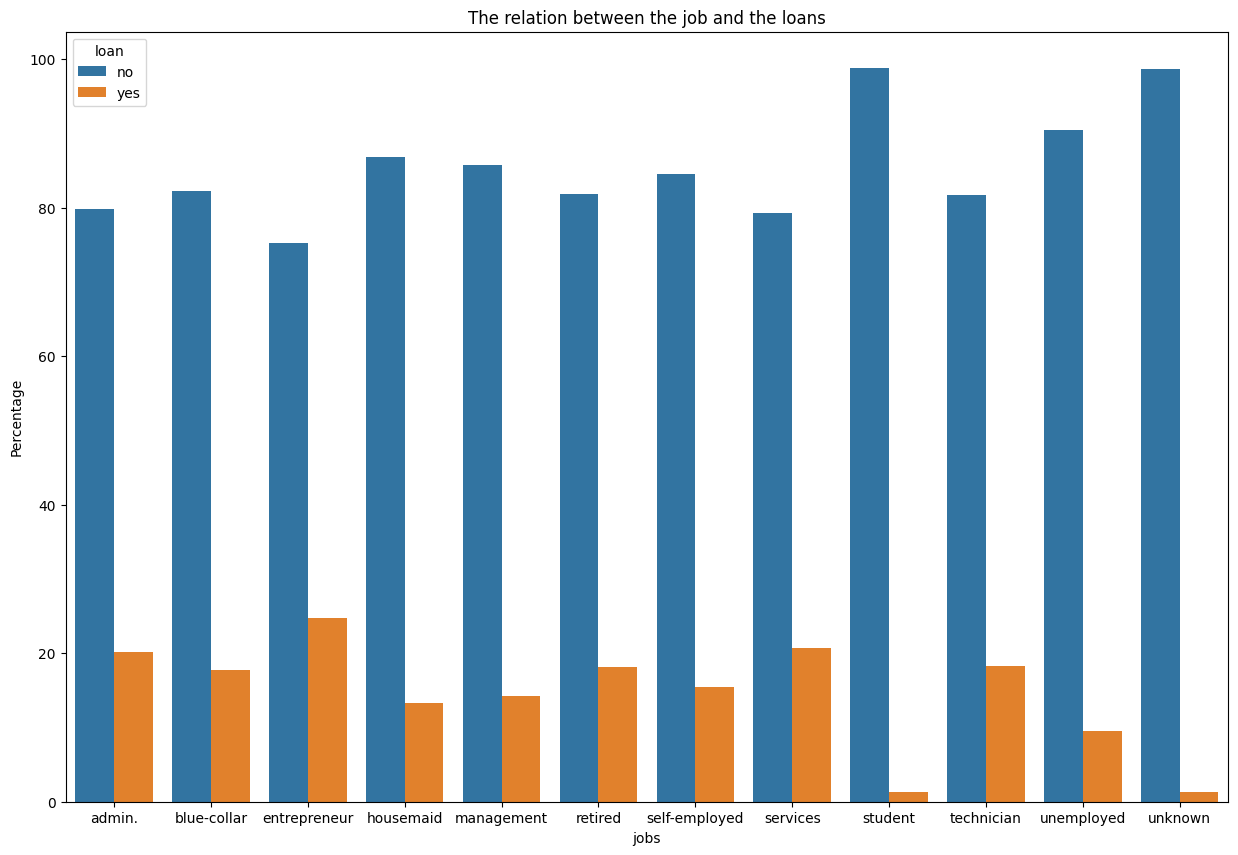

In [40]:
plt.figure(figsize=(15,10))

# Calculate the percentages
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

### Outcome

#### Students have a lower probability to take a personal loan, while technical and business jobs such as entrepreneurs , technicians, and managers tend ro have personal loans

## Q2: Which contact method is more effective in terms of percuading customers to subscribe?

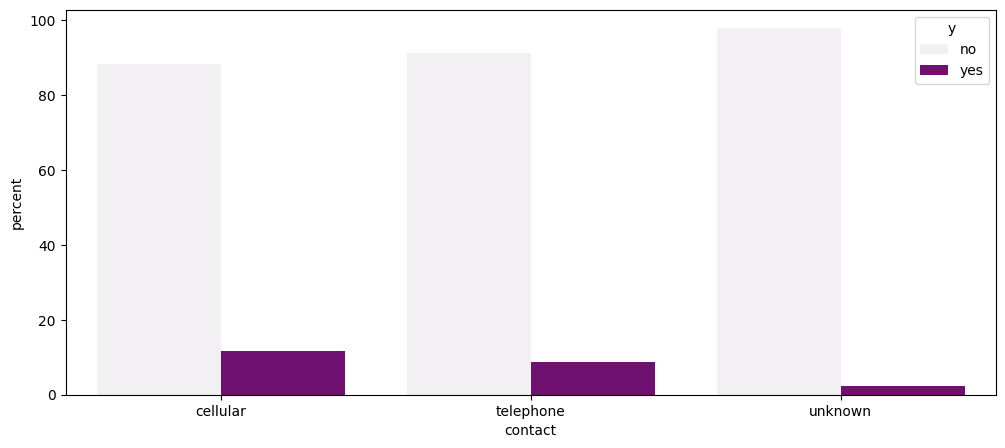

In [45]:
plt.figure(figsize=(12,5))

# Calculate the percentages
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Plot the data
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages, color='purple')

plt.show()

### Outcome

#### Cellular is generally more favorable in terms of persuading customers to subscribing to a term deposit

## Q3: How does job affect Y?

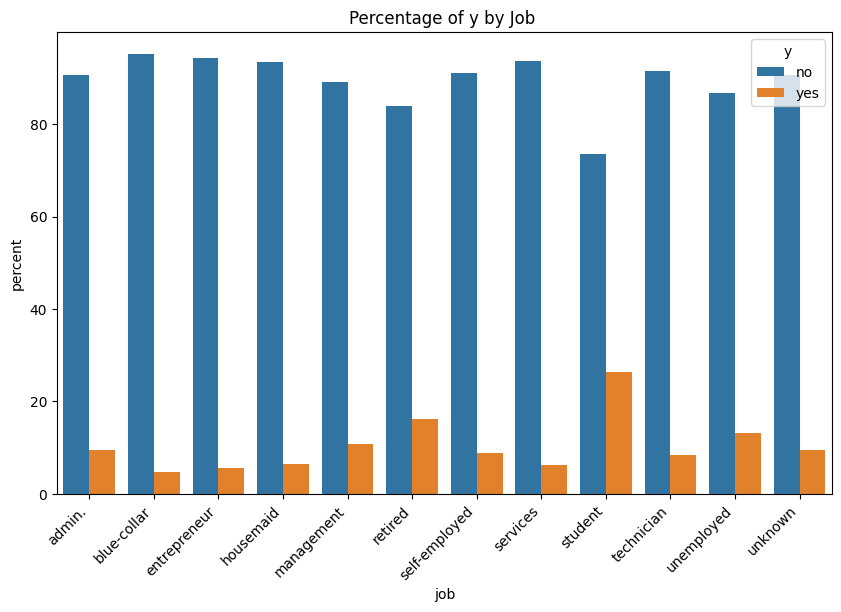

In [47]:
colors = ['#FFB90F', '#33FFA8']
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

### Outcome

#### Students are much more likely to subscribe to a term deposit than any other field

## Q4: How does Marital status affect Y?

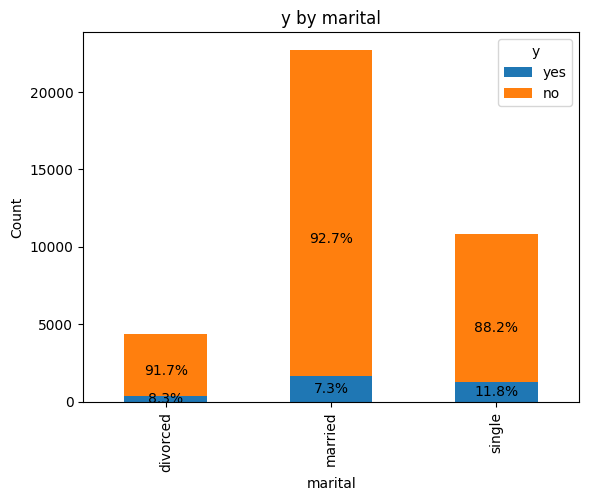

In [48]:
# Reorder the columns
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# Plot the data
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Calculate the percentage values for each bar
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Add text annotations to the chart
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

### Outcome

#### Single customers are more inclined to use a term deposit, despite having a lower count than married customers


## Q5: How does duration affect Y?

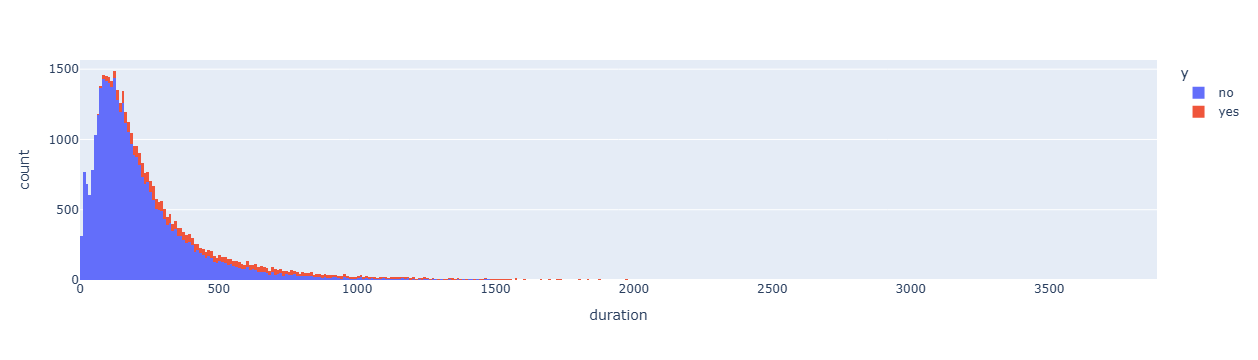

In [137]:
fig = px.histogram(data,x='duration',color='y')
fig.show()

### Outcome

#### The longer the duration to persuade a customer, the more likely it is for the customer to subscribe to a term deposit

## Q6: How does financial status influence subscription decisions?

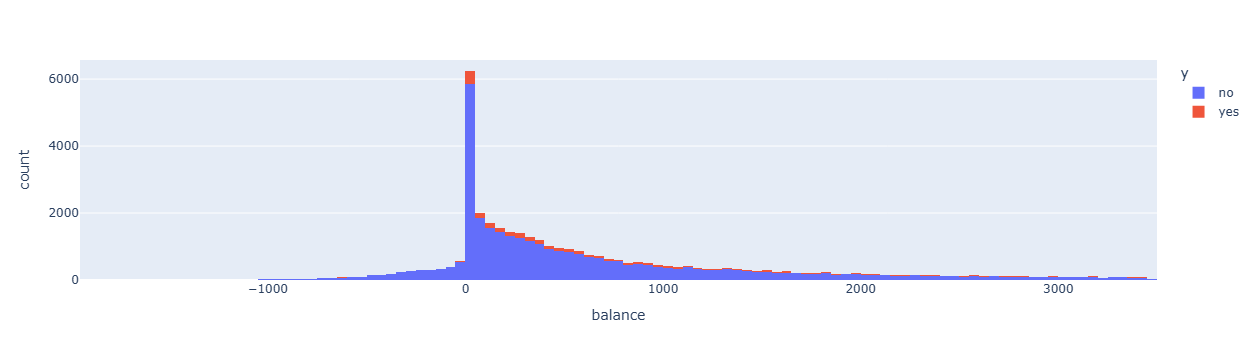

In [50]:
fig = px.histogram(data,x='balance',color='y')
fig.show()

### Outcome

#### Customers with a balance between 0 and 1000 are more likely to use a term deposit


## Q7: How does age affect Y?

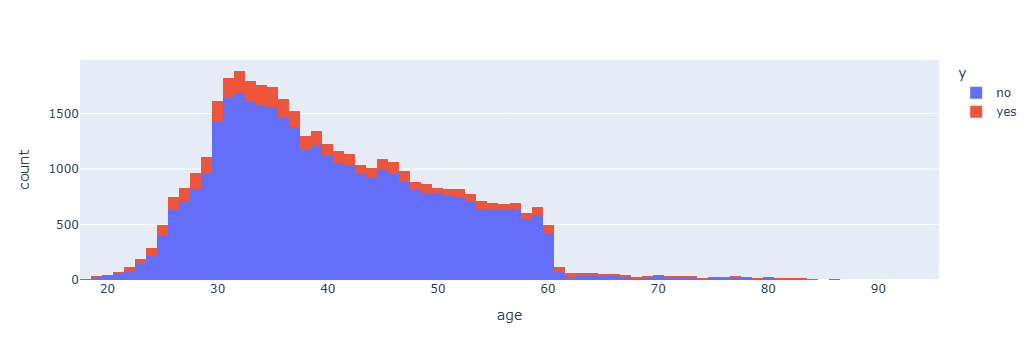

In [138]:
fig = px.histogram(data,x='age',color='y')
fig.show()

### Outcome

#### Younger demographic (age less than 50-60) have a higher chance to subscribe to a term deposit


## Q8: How does housing loans affect Y?

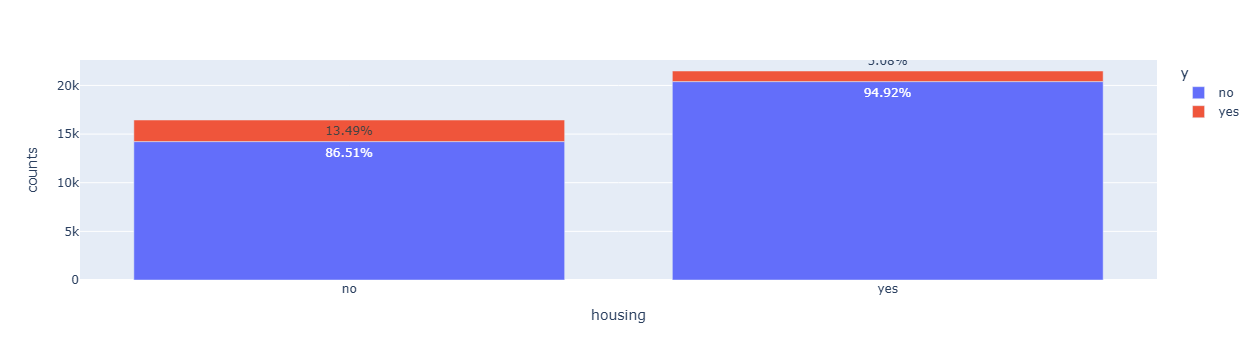

In [52]:
# Calculate the counts for each group
grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')

# Calculate the percentages for each group
percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)

# Assign the percentages to a new column in grouped_df
grouped_df['percentages'] = percentages

# Create the bar chart
fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))

fig.show()

### Outcome

#### Customers with no housing loans are more inclined to use a term deposit

## Q9: What are the key customer segments based on demographic (education) with subscription?

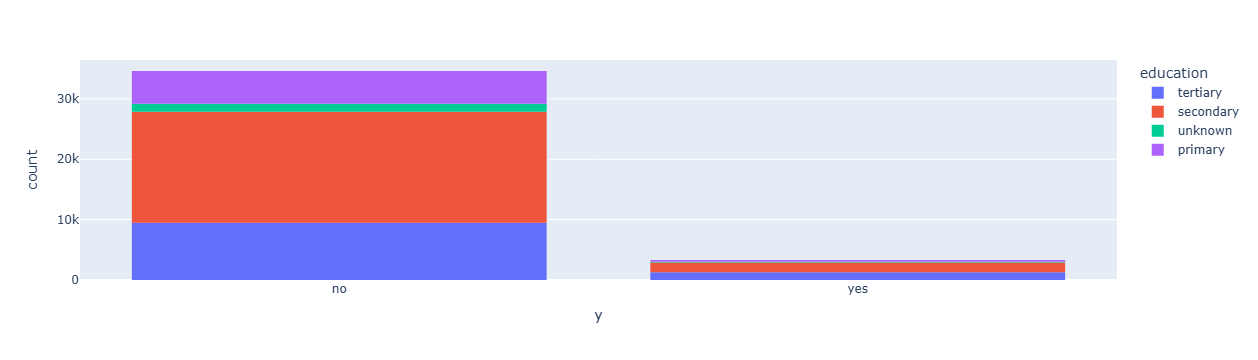

In [53]:
fig = px.histogram(data, x="y",color = 'education')
fig.show()

### Outcome

#### Customers with a Secondary education are much more likely to use a term deposit

## Q10: How does default affect Y?

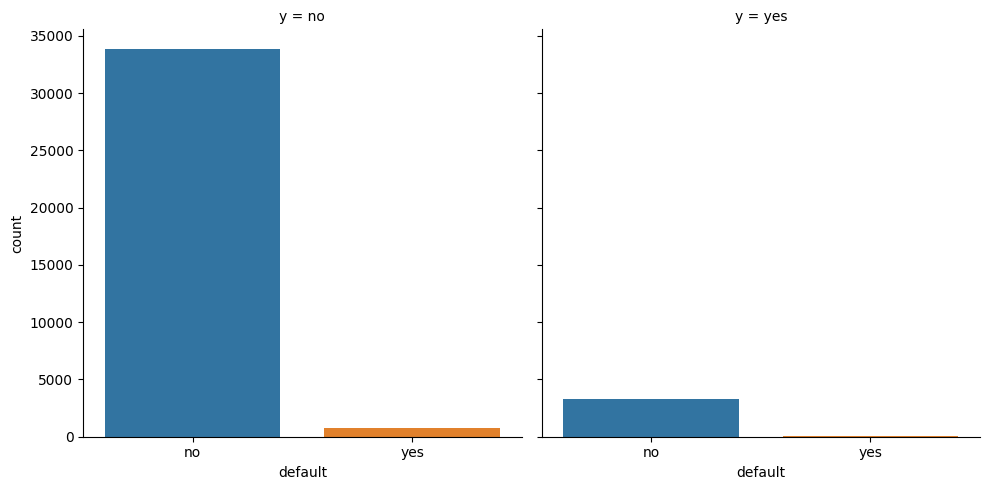

In [54]:
sns.catplot(data=data , x="default" , col="y",kind='count')

### Outcome

#### Customers who have credit in default usually are not subscribed to a term deposit

# Subsciption by month

Text(0.5, 1.0, 'Subscriptions by month')

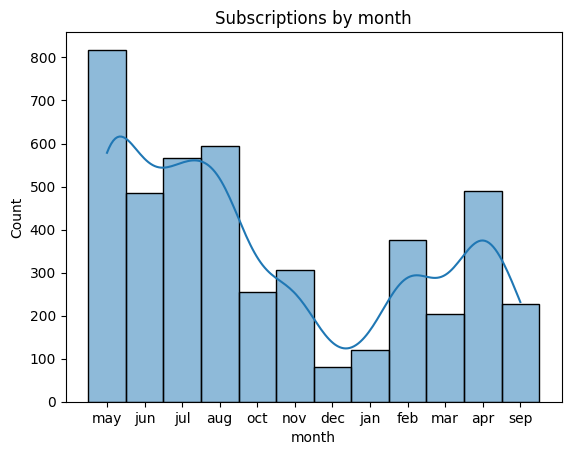

In [134]:
month = data["month"].unique()

winmonth = data[data["y"] == "yes"]
sns.histplot(data = winmonth["month"], kde = True)
plt.title("Subscriptions by month")

# Encoding

In [55]:
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
5       35    management   married   tertiary      no      231     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45202   34        admin.    single  secondary      no      557      no   no   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous    y  
0        unknown    5   may       261         1     -1         0   no  
1        unknown    5   may       151         1     -1         0   no  
2        unknown    5   may        76         1     -1         0   no  
3        unknown    5   may        92         1     -1         0   no  
5        unknown    5   may       139         1     -1         0   no  
...          ...  ...   ...       ...       ...    ...       ...  ...  
45202   cellular   17   nov       224         1     -1         0  yes  
45203   cellular   17   nov       266         1     -1         0  yes  
45205   cellular   17   nov       386         2     -1         0  yes  
45207   cellular   17   nov       456         2     -1         0  yes  
45209  telephone   17   nov       508         4     -1         0   no  

[37928 rows x 16 columns]

In [56]:
cat_features = data.select_dtypes(include=['object', 'bool']).columns.values
print(cat_features)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'y']


In [58]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan'])

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'y' column to numerical values
data_encoded['y'] = label_encoder.fit_transform(data_encoded['y'])


In [60]:
data_encoded['month'] = label_encoder.fit_transform(data_encoded['month'])

In [61]:
data_encoded['education'] = label_encoder.fit_transform(data_encoded['education'])

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
data_encoded

age  education  balance  day  month  duration  campaign  pdays  \
0       58          2     2143    5      8       261         1     -1   
1       44          1       29    5      8       151         1     -1   
2       33          1        2    5      8        76         1     -1   
3       47          3     1506    5      8        92         1     -1   
5       35          2      231    5      8       139         1     -1   
...    ...        ...      ...  ...    ...       ...       ...    ...   
45202   34          1      557   17      9       224         1     -1   
45203   23          2      113   17      9       266         1     -1   
45205   25          1      505   17      9       386         2     -1   
45207   71          0     1729   17      9       456         2     -1   
45209   57          1      668   17      9       508         4     -1   

       previous  y  job_admin.  job_blue-collar  job_entrepreneur  \
0             0  0       False            False             False   
1             0  0       False            False             False   
2             0  0       False            False              True   
3             0  0       False             True             False   
5             0  0       False            False             False   
...         ... ..         ...              ...               ...   
45202         0  1        True            False             False   
45203         0  1       False            False             False   
45205         0  1       False            False             False   
45207         0  1       False            False             False   
45209         0  0       False             True             False   

       job_housemaid  job_management  job_retired  job_self-employed  \
0              False            True        False              False   
1              False           False        False              False   
2              False           False        False              False   
3              False           False        False              False   
5              False            True        False              False   
...              ...             ...          ...                ...   
45202          False           False        False              False   
45203          False           False        False              False   
45205          False           False        False              False   
45207          False           False         True              False   
45209          False           False        False              False   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             False        False           False           False        False   
1             False        False            True           False        False   
2             False        False           False           False        False   
3             False        False           False           False        False   
5             False        False           False           False        False   
...             ...          ...             ...             ...          ...   
45202         False        False           False           False        False   
45203         False         True           False           False        False   
45205         False        False            True           False        False   
45207         False        False           False           False        False   
45209         False        False           False           False        False   

       marital_divorced  marital_married  marital_single  contact_cellular  \
0                 False             True           False             False   
1                 False            False            True             False   
2                 False             True           False             False   
3                 False             True           False             False   
5                 False             True           False             Fals

In [64]:
# Drop columns related to the 'unknown' category
unknown_columns = ['job_unknown', 'contact_unknown']

data_encoded.drop(unknown_columns, axis=1, inplace=True)


In [65]:
data_encoded

age  education  balance  day  month  duration  campaign  pdays  \
0       58          2     2143    5      8       261         1     -1   
1       44          1       29    5      8       151         1     -1   
2       33          1        2    5      8        76         1     -1   
3       47          3     1506    5      8        92         1     -1   
5       35          2      231    5      8       139         1     -1   
...    ...        ...      ...  ...    ...       ...       ...    ...   
45202   34          1      557   17      9       224         1     -1   
45203   23          2      113   17      9       266         1     -1   
45205   25          1      505   17      9       386         2     -1   
45207   71          0     1729   17      9       456         2     -1   
45209   57          1      668   17      9       508         4     -1   

       previous  y  job_admin.  job_blue-collar  job_entrepreneur  \
0             0  0       False            False             False   
1             0  0       False            False             False   
2             0  0       False            False              True   
3             0  0       False             True             False   
5             0  0       False            False             False   
...         ... ..         ...              ...               ...   
45202         0  1        True            False             False   
45203         0  1       False            False             False   
45205         0  1       False            False             False   
45207         0  1       False            False             False   
45209         0  0       False             True             False   

       job_housemaid  job_management  job_retired  job_self-employed  \
0              False            True        False              False   
1              False           False        False              False   
2              False           False        False              False   
3              False           False        False              False   
5              False            True        False              False   
...              ...             ...          ...                ...   
45202          False           False        False              False   
45203          False           False        False              False   
45205          False           False        False              False   
45207          False           False         True              False   
45209          False           False        False              False   

       job_services  job_student  job_technician  job_unemployed  \
0             False        False           False           False   
1             False        False            True           False   
2             False        False           False           False   
3             False        False           False           False   
5             False        False           False           False   
...             ...          ...             ...             ...   
45202         False        False           False           False   
45203         False         True           False           False   
45205         False        False            True           False   
45207         False        False           False           False   
45209         False        False           False           False   

       marital_divorced  marital_married  marital_single  contact_cellular  \
0                 False             True           False             False   
1                 False            False            True             False   
2                 False             True           False             False   
3                 False             True           False             False   
5                 False             True           False             False   
...                 ...              ...             ...               ...   
45202             False            False            True              Tru

In [66]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37928 entries, 0 to 45209
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                37928 non-null  int64
 1   education          37928 non-null  int32
 2   balance            37928 non-null  int64
 3   day                37928 non-null  int64
 4   month              37928 non-null  int32
 5   duration           37928 non-null  int64
 6   campaign           37928 non-null  int64
 7   pdays              37928 non-null  int64
 8   previous           37928 non-null  int64
 9   y                  37928 non-null  int32
 10  job_admin.         37928 non-null  bool 
 11  job_blue-collar    37928 non-null  bool 
 12  job_entrepreneur   37928 non-null  bool 
 13  job_housemaid      37928 non-null  bool 
 14  job_management     37928 non-null  bool 
 15  job_retired        37928 non-null  bool 
 16  job_self-employed  37928 non-null  bool 
 17  job_services     

In [67]:
data_encoded.shape

(37928, 32)

# Splitting Data

In [68]:
from sklearn.model_selection import train_test_split


X = data_encoded.drop(columns=['y'])
y = data_encoded['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [69]:
X.shape

(37928, 31)

In [71]:
y.shape

(37928,)

## Sampling

In [72]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (data['y'] == 'yes').sum()
no_count = (data['y'] == 'no').sum()

# Calculate the total count of values in the 'y' column
total_count = len(data)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("before sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)


before sampling
Percentage of 'yes' in 'y': 8.72969837587007
Percentage of 'no' in 'y': 91.27030162412993


In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [75]:
# Concatenate the resampled 'X' and 'y' to form a new DataFrame
resampled_data = pd.concat([X_resampled, pd.Series(y_resampled, name='y')], axis=1)

After sampling
Percentage of 'yes' in 'y': 50.0
Percentage of 'no' in 'y': 50.0


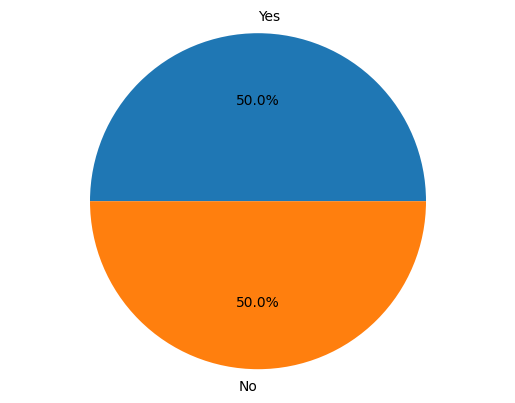

In [76]:
# Calculate the count of 'yes' and 'no' in the 'y' column
yes_count = (resampled_data['y'] == 1).sum()
no_count = (resampled_data['y'] == 0).sum()

# Calculate the total count of values in the 'y' column
total_count = len(resampled_data)

# Calculate the percentage of 'yes' and 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("After sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)


# Create a pie chart
labels = ['Yes', 'No']
sizes = [percentage_yes, percentage_no]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### splitting Resampled Data

In [77]:
# Separate features (X) and the target variable (y) from the resampled data
X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Modeling

### 1. Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.8055174406008522

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      6883
           1       0.81      0.80      0.81      6964

    accuracy                           0.81     13847
   macro avg       0.81      0.81      0.81     13847
weighted avg       0.81      0.81      0.81     13847


Confusion Matrix for Test Set:
[[5595 1288]
 [1405 5559]]


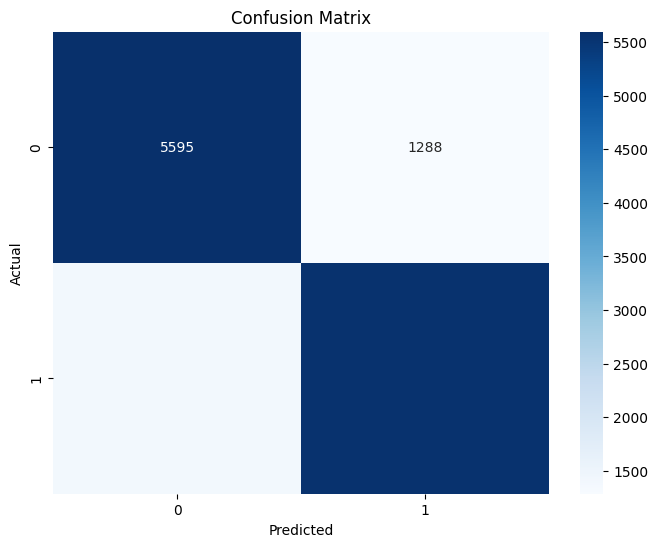

In [79]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Use other metrics as needed (e.g., precision, recall, F1-score)
# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2. Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred = clf.predict(X_test)


#### Evaluate Model Performance:

Training Accuracy: 1.0

Test Accuracy: 0.9555138297104065

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6883
           1       0.97      0.94      0.96      6964

    accuracy                           0.96     13847
   macro avg       0.96      0.96      0.96     13847
weighted avg       0.96      0.96      0.96     13847


Confusion Matrix for Test Set:
[[6692  191]
 [ 425 6539]]


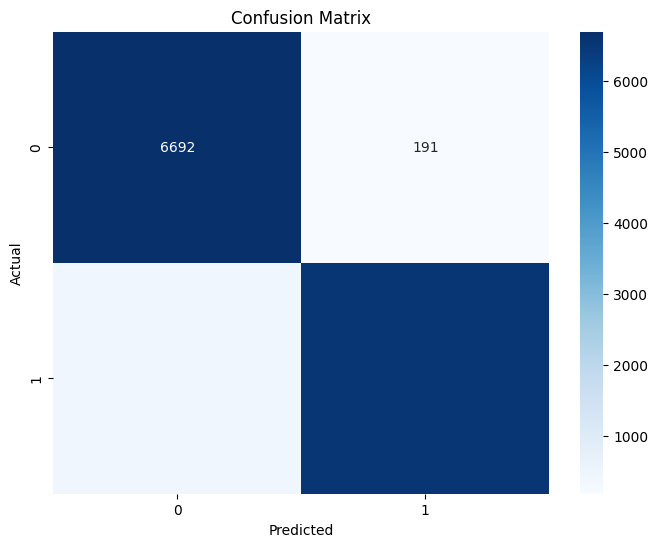

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = clf.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Feature Importance

In [86]:
feature_importance = clf.feature_importances_
# You can associate these scores with feature names for better understanding
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


duration: 0.2024
housing_yes: 0.1181
month: 0.0512
marital_married: 0.0491
balance: 0.0485
pdays: 0.0460
job_blue-collar: 0.0436
housing_no: 0.0423
day: 0.0401
age: 0.0383
campaign: 0.0338
marital_single: 0.0336
loan_yes: 0.0324
job_technician: 0.0282
marital_divorced: 0.0272
previous: 0.0261
job_services: 0.0213
job_management: 0.0195
job_admin.: 0.0185
education: 0.0147
loan_no: 0.0124
contact_cellular: 0.0085
job_self-employed: 0.0074
job_housemaid: 0.0073
job_entrepreneur: 0.0070
job_unemployed: 0.0064
job_retired: 0.0062
contact_telephone: 0.0045
job_student: 0.0032
default_no: 0.0014
default_yes: 0.0009


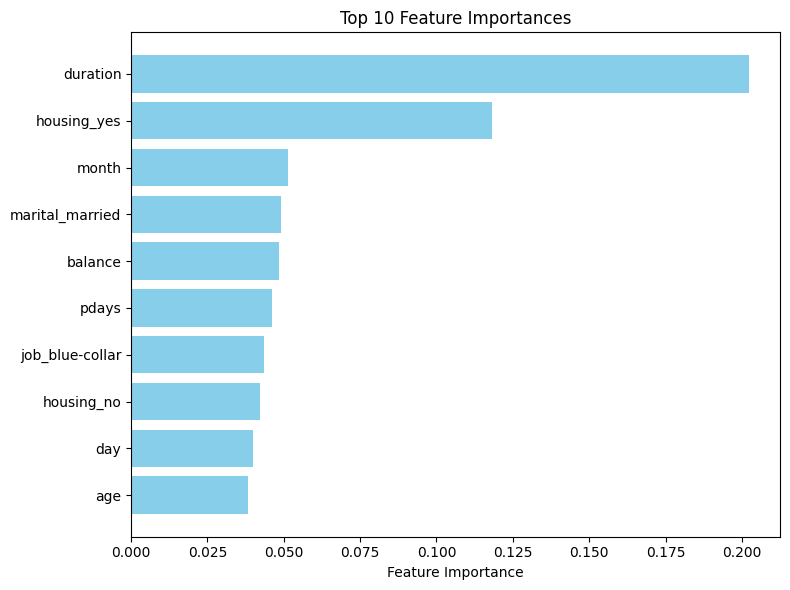

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf is your trained model and X_train is your training DataFrame
feature_importance = clf.feature_importances_
feature_names = X_train.columns

# Create a dictionary and sort by importance
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select top 10 features
top_features = sorted_feature_importance[:10]
features, importances = zip(*top_features)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()


#### Hyperparameter Tuning

In [87]:
"""from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
a
# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
"""

"from sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grid for tuning\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\na\n# Perform grid search\ngrid_search = GridSearchCV(clf, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n"

In [88]:
#best_params

In [89]:
clf2 = RandomForestClassifier(n_estimators= 200, max_depth =20,min_samples_leaf= 1,min_samples_split=2, random_state=42)

# Train the model
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [90]:
y_pred = clf2.predict(X_test)

Training Accuracy: 0.9969487424846986

Test Accuracy: 0.9530584242074095

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6883
           1       0.97      0.94      0.95      6964

    accuracy                           0.95     13847
   macro avg       0.95      0.95      0.95     13847
weighted avg       0.95      0.95      0.95     13847


Confusion Matrix for Test Set:
[[6651  232]
 [ 418 6546]]


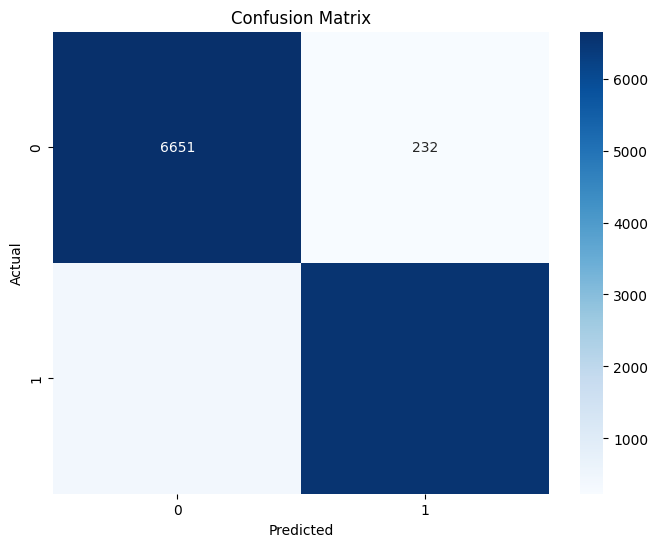

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = clf2.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf2.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
clf3 = DecisionTreeClassifier(random_state=42)

# Train the model
clf3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
y_pred = clf3.predict(X_test)


Training Accuracy: 1.0

Test Accuracy: 0.9248212609229436

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6883
           1       0.92      0.93      0.93      6964

    accuracy                           0.92     13847
   macro avg       0.92      0.92      0.92     13847
weighted avg       0.92      0.92      0.92     13847


Confusion Matrix for Test Set:
[[6312  571]
 [ 470 6494]]


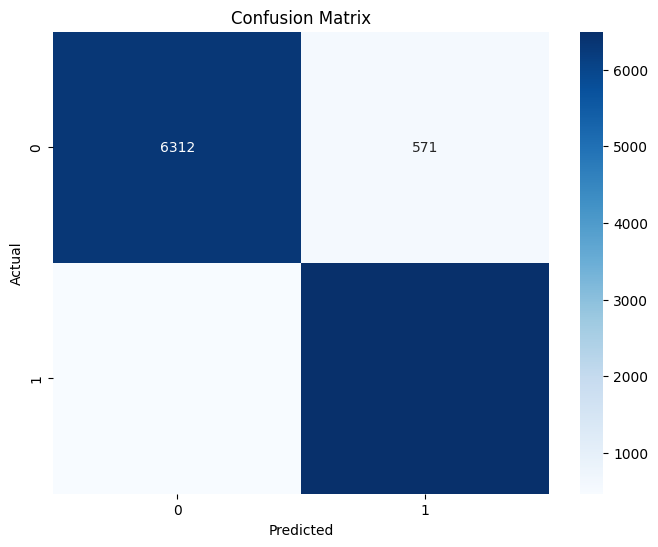

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = clf3.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf3.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
"""from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
"""

"from sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grid for tuning\nparam_grid = {\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'criterion': ['gini', 'entropy']\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(clf, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n"

In [98]:
#best_params

In [99]:
clf4 = DecisionTreeClassifier(random_state=42 , criterion='gini', max_depth=20 ,min_samples_split= 2)

# Train the model
clf4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [100]:
y_pred = clf4.predict(X_test)

Training Accuracy: 0.9947641143228555

Test Accuracy: 0.9230158157001517

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6883
           1       0.92      0.93      0.92      6964

    accuracy                           0.92     13847
   macro avg       0.92      0.92      0.92     13847
weighted avg       0.92      0.92      0.92     13847


Confusion Matrix for Test Set:
[[6297  586]
 [ 480 6484]]


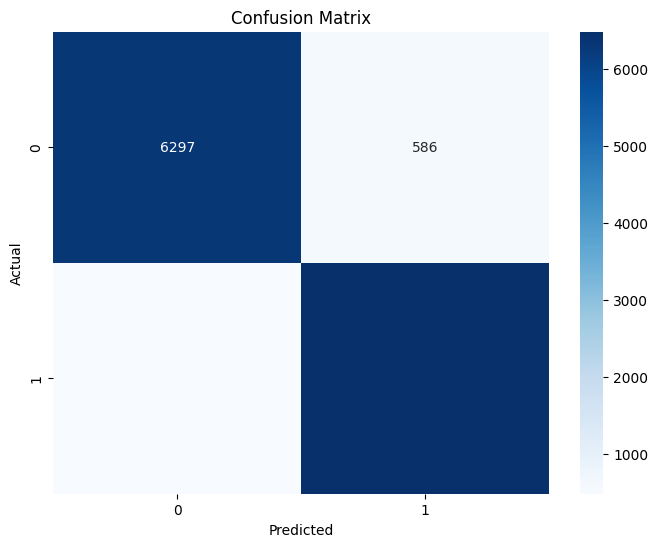

In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = clf4.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf4.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4. XGboost

In [104]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [106]:
# Initialize the XGBoost classifier
clf5 = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model on the training data
clf5.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [107]:
y_pred = clf5.predict(X_test)

Training Accuracy: 0.9776301298138552

Test Accuracy: 0.9532028598252329

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6883
           1       0.96      0.94      0.95      6964

    accuracy                           0.95     13847
   macro avg       0.95      0.95      0.95     13847
weighted avg       0.95      0.95      0.95     13847


Confusion Matrix for Test Set:
[[6645  238]
 [ 410 6554]]


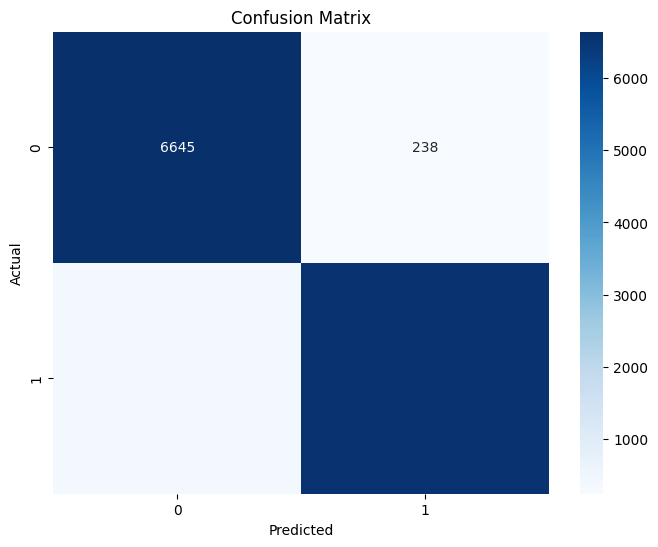

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = clf5.predict(X_train)

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test data
y_test_pred = clf5.predict(X_test)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Generate a classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Comparing models

                     Accuracy  Precision    Recall  F1 Score       AUC
Random Forest        0.955514   0.971620  0.938972  0.955017  0.991769
XGBoost              0.953203   0.964959  0.941126  0.952893  0.991237
Decision Tree        0.924821   0.919179  0.932510  0.925797  0.924776
Logistic Regression  0.805517   0.811888  0.798248  0.805010  0.878232


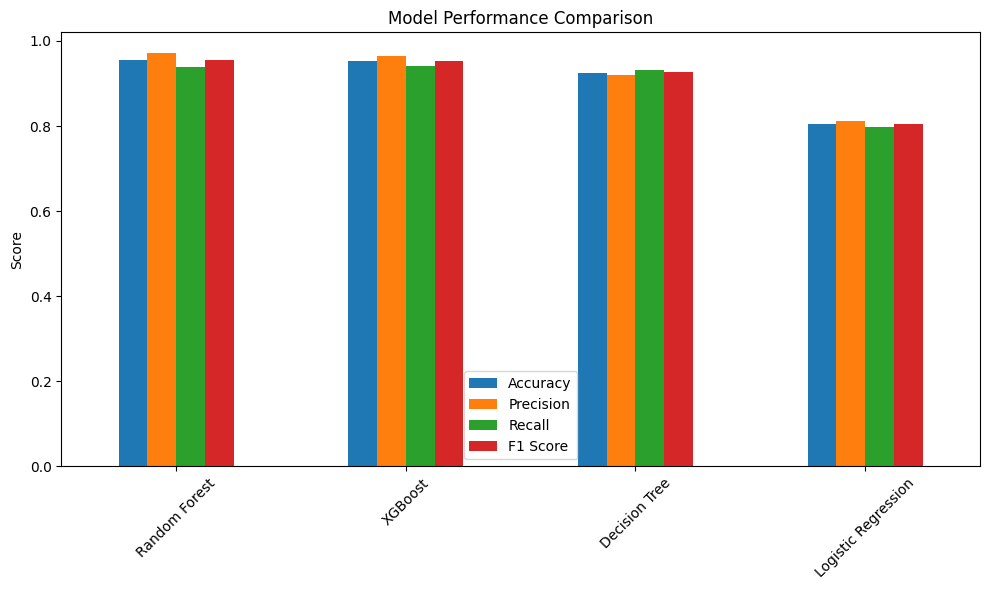

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary of your trained models
models = {
    'Logistic Regression': model,
    'Random Forest': clf,
    'Decision Tree': clf3,
    'XGBoost': clf5
}

model_results = {}

for model_name, model_obj in models.items():
    y_pred = model_obj.predict(X_test)
    
    # For AUC: check if model has predict_proba
    if hasattr(model_obj, "predict_proba"):
        y_proba = model_obj.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    model_results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

# Convert results into DataFrame
results_df = pd.DataFrame(model_results).T.sort_values(by='F1 Score', ascending=False)

# Show table
print(results_df)

# Optional: Visual comparison using bar plot
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Find the best model based on F1 Score and AUC score

In [143]:
# Find the best model based on F1 Score
best_f1_model = results_df['F1 Score'].idxmax()
best_f1_value = results_df['F1 Score'].max()

print(f" Best Model based on F1 Score: {best_f1_model} (F1 Score = {best_f1_value:.4f})")

# Find the best model based on AUC
# Note: Some models (like Decision Trees without predict_proba) might have AUC as NaN, so we ignore NaNs
best_auc_model = results_df['AUC'].idxmax()
best_auc_value = results_df['AUC'].max()

print(f" Best Model based on AUC: {best_auc_model} (AUC = {best_auc_value:.4f})")


 Best Model based on F1 Score: Random Forest (F1 Score = 0.9550)
 Best Model based on AUC: Random Forest (AUC = 0.9918)


# Random Forest is the Best Model